# The Economic Costs of Conflict
### Abadie & Gardeazabel

This notebook reproduces the weights from the 2003 paper "The Economic Costs of Conflict: A Case Study of the Basque Country" by Alberto Abadie and Javier Gardeazabal. The study data is contained in the file `../data/basque.csv` (more detailed information on this dataset is available on page 2 of the ``R`` ``synth`` package documentation [here](https://cran.r-project.org/web/packages/Synth/Synth.pdf)).

In [3]:
import pandas as pd
from pysyncon import Dataprep, Synth
from pysyncon.utils import PlaceboTest

We prepare the study data using a `Dataprep` object that describes all the details needed to define the synthetic control study. This works similarly to the `dataprep` method in the `R` package `synth`.

(For an explanation of each of the `Dataprep` arguments, see the package [documentation](https://sdfordham.github.io/pysyncon/dataprep.html#pysyncon.Dataprep)).

In [4]:
df = pd.read_csv("../data/basque.csv")
df.head()

,regionno,regionname,year,gdpcap,sec.agriculture,sec.energy,sec.industry,sec.construction,sec.services.venta,sec.services.nonventa,school.illit,school.prim,school.med,school.high,school.post.high,popdens,invest
0,1.0,Spain (Espana),1955.0,2.354542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Spain (Espana),1956.0,2.480149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Spain (Espana),1957.0,2.603613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Spain (Espana),1958.0,2.637104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Spain (Espana),1959.0,2.669880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Spain (Espana)",
        "Andalucia",
        "Aragon",
        "Principado De Asturias",
        "Baleares (Islas)",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Rioja (La)",
    ],
    time_optimize_ssr=range(1960, 1965),
)

print(dataprep)

Dataprep
Treated unit: Basque Country (Pais Vasco)
Dependent variable: gdpcap
Control units: Spain (Espana), Andalucia, Aragon, Principado De Asturias, Baleares (Islas), Canarias, Cantabria, Castilla Y Leon, Castilla-La Mancha, Cataluna, Comunidad Valenciana, Extremadura, Galicia, Madrid (Comunidad De), Murcia (Region de), Navarra (Comunidad Foral De), Rioja (La)
Time range in data: 1955.0 - 1997.0
Time range for loss minimization: range(1960, 1965)
Time range for predictors: range(1964, 1970)
Predictors: school.illit, school.prim, school.med, school.high, school.post.high, invest
Special predictors:
    `gdpcap` over `range(1960, 1970)` using `mean`
    `sec.agriculture` over `range(1961, 1970, 2)` using `mean`
    `sec.energy` over `range(1961, 1970, 2)` using `mean`
    `sec.industry` over `range(1961, 1970, 2)` using `mean`
    `sec.construction` over `range(1961, 1970, 2)` using `mean`
    `sec.services.venta` over `range(1961, 1970, 2)` using `mean`
    `sec.services.nonventa` ov

We supply the `Dataprep` object to a `Synth` object. The optimisation scheme we use is [Nelder-Mead](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html) and the starting point for the optimisation is `equal` i.e. with all weights equal. (Unlike the `R` package `synth` which performs four different runs under the hood (two different starting points and two different optimisation schemes), in this package only one optimisation is run per `fit`).

*Nota bene that the weights obtained by the synthetic control method are often highly sensitive to the chosen optimisation scheme and starting point*.

In [17]:
synth = Synth()
synth.fit(dataprep=dataprep, optim_method="Nelder-Mead", optim_initial="equal")

synth.weights()

Spain (Espana)                  0.00
Andalucia                       0.00
Aragon                          0.00
Principado De Asturias          0.00
Baleares (Islas)                0.00
Canarias                        0.00
Cantabria                       0.00
Castilla Y Leon                 0.00
Castilla-La Mancha              0.00
Cataluna                        0.92
Comunidad Valenciana            0.00
Extremadura                     0.00
Galicia                         0.00
Madrid (Comunidad De)           0.08
Murcia (Region de)              0.00
Navarra (Comunidad Foral De)    0.00
Rioja (La)                      0.00
Name: weights, dtype: float64

The synthetic control obtained from the optimisation is: $$\text{Synthetic Control} = 0.851 \times \text{Cataluna} + 0.149 \times \text{Madrid}.$$

The `path_plot` method shows the path of the treated unit and the synthetic control over time.

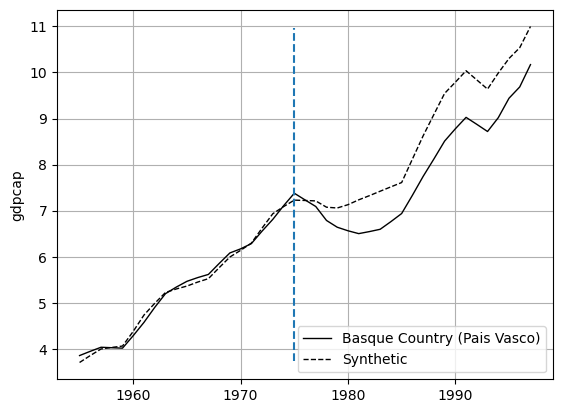

In [7]:
synth.path_plot(time_period=range(1955, 1998), treatment_time=1975)

The `gaps_plot` method shows the gaps (the difference between the treated unit and the synthetic control) over time.

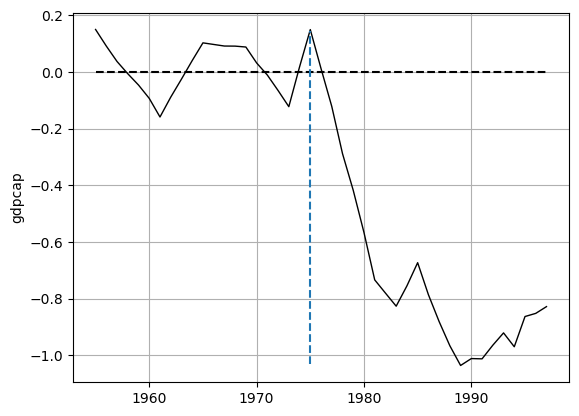

In [8]:
synth.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)

Compute the average treatment effect on the treated unit (ATT) over the post-treatment time period, also returns a standard error (se).

In [9]:
synth.att(time_period=range(1975, 1998))

{'att': -0.6995653768672561, 'se': 0.07078077988529438}

The summary function gives more information on the predictor values. The first column shows the value of the $V$ matrix for each predictor, the column 'treated' shows the mean value of each predictor for the treated unit over the time period `time_predictors_prior`, the column 'synthetic' shows the mean value of each predictor for the synthetic control over the time period `time_predictors_prior` and finally the column 'sample mean' shows the sample mean of that predictor for all control units over the time period `time_predictors_prior` i.e. this is the same as the synthetic control with all weights equal.

In [10]:
synth.summary()

,V,treated,synthetic,sample mean
school.illit,0.073,39.888,256.336,323.826
school.prim,0.120,1031.742,2730.104,2182.453
school.med,0.003,90.359,223.340,148.864
school.high,0.102,25.728,63.437,47.133
school.post.high,0.011,13.480,36.154,26.163
invest,0.000,24.647,21.583,21.445
special.1.gdpcap,0.117,5.285,5.271,3.584
special.2.sec.agriculture,0.063,6.844,6.179,21.058
special.3.sec.energy,0.156,4.106,2.760,5.252
special.4.sec.industry,0.096,45.082,37.636,22.670


We can run a Placebo test using the `PlaceboTest` class. After instantiating it, we supply the original `Dataprep` object to it as well as a synthetic control method object (our `synth` from previously) and any options that we want to supply to the synthetic control method object (the optimisation scheme and starting point for the optimisation scheme).

In [11]:
placebo_test = PlaceboTest()
placebo_test.fit(
    dataprep=dataprep,
    scm=synth,
    scm_options={"optim_method": "Nelder-Mead", "optim_initial": "equal"},
)

(1/17) Completed placebo test for Spain (Espana).
(2/17) Completed placebo test for Castilla-La Mancha.
(3/17) Completed placebo test for Cantabria.
(4/17) Completed placebo test for Castilla Y Leon.
(5/17) Completed placebo test for Principado De Asturias.
(6/17) Completed placebo test for Canarias.
(7/17) Completed placebo test for Baleares (Islas).


(8/17) Completed placebo test for Cataluna.
(9/17) Completed placebo test for Madrid (Comunidad De).
(10/17) Completed placebo test for Andalucia.
(11/17) Completed placebo test for Aragon.
(12/17) Completed placebo test for Extremadura.
(13/17) Completed placebo test for Comunidad Valenciana.
(14/17) Completed placebo test for Rioja (La).
(15/17) Completed placebo test for Murcia (Region de).
(16/17) Completed placebo test for Navarra (Comunidad Foral De).
(17/17) Completed placebo test for Galicia.
Calculating treated unit gaps.
Done.


We can plot the gaps for the treated unit as well as all the placebos in one graph using the `gaps_plot` method of the `PlaceboTest` class.

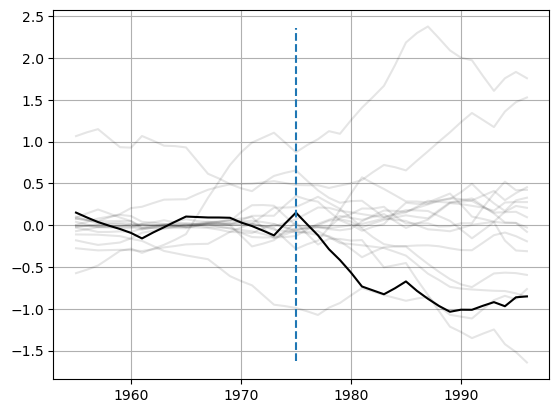

In [12]:
placebo_test.gaps_plot(
    time_period=range(1955, 1998), treatment_time=1975, exclude_units=["Spain (Espana)"]
)

We can refine the gaps plot by removing those placebos that did not have a good pre-treatment match, namely we can remove from the plot any placebo whose pre-treatment mean-square prediction error is $> n\, \times $ the pre-treatment mean-square prediction error of the treated unit. The following graph is a refined version of the previous with $n=1$ (`mspe_threshold=1`).

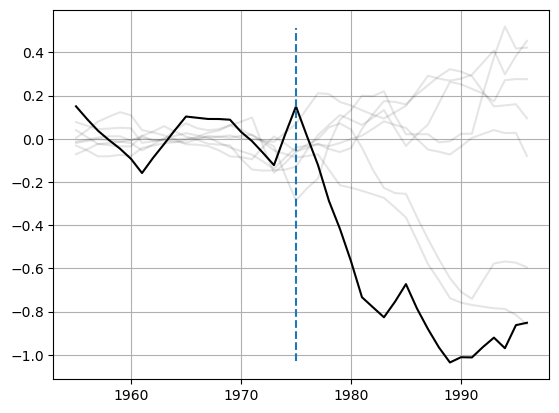

In [13]:
placebo_test.gaps_plot(
    time_period=range(1955, 1998),
    treatment_time=1975,
    exclude_units=["Spain (Espana)"],
    mspe_threshold=1,
)

We calculate $p$-value of Abadie et al's version of Fisher's exact hypothesis test for no effect of treatment null using the `pvalue` method.

In [14]:
placebo_test.pvalue(treatment_time=1975)

0.16666666666666666

We can calculate 95% confidence intervals for the treatment effect for the time periods $t=1976, 1977$. (For technical reasons involving permutation tests, we need to use all the pre-intervention time periods here rather than just the period 1960-1970 where the optimisation was carried out if we want a significance level of $\alpha=0.05$).

**(The following cell can take a while to run.)**

In [15]:
synth.confidence_interval(
    alpha=0.05,
    time_periods=[1976, 1977],
    pre_periods=list(range(1955, 1975)),
    tol=0.01,
    verbose=False,
)

,value,lower_ci,upper_ci
time,,,
1976.0,0.012254,-0.167883,0.192392
1977.0,-0.121308,-0.301446,0.072103
